# Analisis ulasan Shopee

Data tersebut diperoleh dari laman Google Play Store dengan menggunakan teknik scrapping, batasan dari pengambilan data yaitu sebagai berikut:


*   Data tersebut merupakan data ulasan pada bulan Jan - Feb 2022
*   ulasan yang memiliki nilai rating sama dengan tiga tidak digunakan, karena dinilai netral, dimana tujuan analisis ini yaitu klasifikasi analisis sentimen ulasan Shopee



Code ini menjelaskan tahap pre-processing dan EDA untuk data ulasan Shopee

## Pre-Processing Shopee

In [ ]:
import pandas as pd
import numpy as np
 
#read data
abc=pd.read_csv("shopee.csv")
usecoloms=(["score, Klasifikasi, content"])
review1=pd.DataFrame(abc).drop_duplicates().reset_index(drop=True)
review1.head()

,userName,score,Klasifikasi,at,content
0,Annur Mayanti,5,1,2/28/2022 23:53,Sangat membantu sih olshop terpercaya meskipun...
1,Edwin HK,1,0,2/28/2022 23:53,Masa ngirim buku dari jogja ke solo butuh 4 ha...
2,Muhammad Kurniawan,1,0,2/28/2022 23:47,Gratis ongkir shopeefood lama-lama jadi kepoto...
3,Wlnda Sari,1,0,2/28/2022 23:47,Jelek pengguna baru sekarang tidak bisa menggu...
4,ahmad saefuddin,5,1,2/28/2022 23:44,belanja online ternyaman cuma di shopee 😊 tolo...


**DATA CLEANING**


*   Case folding
*   Menghapus karakter spesial
*   Mengapus angka
*   Menghapus punctuation
*   Menghapus whitespace
*   Menghapus single karakter



In [ ]:
import string
import re

#case folding
review1['content'] = review1['content'].str.lower()

#remove spesial karakter
def remove_content_special(text):
  # remove tab, new line, ans back slice
  text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
  # remove non ASCII (emoticon, chinese word, .etc)
  text = text.encode('ascii', 'replace').decode('ascii')
  # remove mention, link, hashtag
  text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
  # remove incomplete URL
  return text.replace("http://", " ").replace("https://", " ")

review1['content'] = review1['content'].apply(remove_content_special)

#remove number
def remove_number(text):
  return re.sub(r"\d+", "", text)
review1['content'] = review1['content'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
  return text.translate(str.maketrans(string.punctuation,' ' * len
  (string.punctuation) ))
review1['content'] = review1['content'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
  return text.strip()
review1['content'] = review1['content'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
  return re.sub('\s+',' ',text)
review1['content'] = review1['content'].apply(remove_whitespace_multiple)

#remove single char
def remove_singl_char(text):
  return re.sub(r"\b[a-zA-Z]\b", "", text)
review1['content'] = review1['content'].apply(remove_singl_char)
print(review1['content'])

0        sangat membantu sih olshop terpercaya meskipun...
1        masa ngirim buku dari jogja ke solo butuh hari...
2        gratis ongkir shopeefood lama lama jadi kepoto...
3        jelek pengguna baru sekarang tidak bisa menggu...
4        belanja online ternyaman cuma di shopee tolong...
                               ...                        
11250    pengajuan paylater sangat ribet pelayanan peng...
11251    app shopee gak jelas ngapain login ada fitur c...
11252    entah kenapa saldo shopeepay masih lebih dari ...
11253    kendala top up yg belum masuk mesti nunggu ber...
11254    alhamdulillah sangat membantu memenuhi kebutuh...
Name: content, Length: 11255, dtype: object


In [ ]:
#berikut 5 data pertama setelah dilakukan data cleaning
review1.head()

,userName,score,Klasifikasi,at,content
0,Annur Mayanti,5,1,2/28/2022 23:53,sangat membantu sih olshop terpercaya meskipun...
1,Edwin HK,1,0,2/28/2022 23:53,masa ngirim buku dari jogja ke solo butuh hari...
2,Muhammad Kurniawan,1,0,2/28/2022 23:47,gratis ongkir shopeefood lama lama jadi kepoto...
3,Wlnda Sari,1,0,2/28/2022 23:47,jelek pengguna baru sekarang tidak bisa menggu...
4,ahmad saefuddin,5,1,2/28/2022 23:44,belanja online ternyaman cuma di shopee tolong...


In [ ]:
#berikut 5 data terakhir setelah dilakukan data cleaning
review1.tail()

,userName,score,Klasifikasi,at,content
11250,Ardi Yansah,4,1,1/1/2022 1:01,pengajuan paylater sangat ribet pelayanan peng...
11251,Barokah Fotocopy & Stationery,2,0,1/1/2022 0:49,app shopee gak jelas ngapain login ada fitur c...
11252,Siti Nurhidayati,2,0,1/1/2022 0:45,entah kenapa saldo shopeepay masih lebih dari ...
11253,arjun sitepu,1,0,1/1/2022 0:27,kendala top up yg belum masuk mesti nunggu ber...
11254,Yes yes Yes,5,1,1/1/2022 0:02,alhamdulillah sangat membantu memenuhi kebutuh...


In [ ]:
review1['content']

0        sangat membantu sih olshop terpercaya meskipun...
1        masa ngirim buku dari jogja ke solo butuh hari...
2        gratis ongkir shopeefood lama lama jadi kepoto...
3        jelek pengguna baru sekarang tidak bisa menggu...
4        belanja online ternyaman cuma di shopee tolong...
                               ...                        
11250    pengajuan paylater sangat ribet pelayanan peng...
11251    app shopee gak jelas ngapain login ada fitur c...
11252    entah kenapa saldo shopeepay masih lebih dari ...
11253    kendala top up yg belum masuk mesti nunggu ber...
11254    alhamdulillah sangat membantu memenuhi kebutuh...
Name: content, Length: 11255, dtype: object

**TOKENIZING**

berikut merupakan proses tahap tokenizing, yang bertujuan memisahkan (split) kalimat menjadi kata per kata.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize 
nltk.download('punkt')

review1['content'].dropna(inplace=True)
review1['content'] = review1['content'].apply(word_tokenize)
print(review1['content'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0        [sangat, membantu, sih, olshop, terpercaya, me...
1        [masa, ngirim, buku, dari, jogja, ke, solo, bu...
2        [gratis, ongkir, shopeefood, lama, lama, jadi,...
3        [jelek, pengguna, baru, sekarang, tidak, bisa,...
4        [belanja, online, ternyaman, cuma, di, shopee,...
                               ...                        
11250    [pengajuan, paylater, sangat, ribet, pelayanan...
11251    [app, shopee, gak, jelas, ngapain, login, ada,...
11252    [entah, kenapa, saldo, shopeepay, masih, lebih...
11253    [kendala, top, up, yg, belum, masuk, mesti, nu...
11254    [alhamdulillah, sangat, membantu, memenuhi, ke...
Name: content, Length: 11255, dtype: object


**STOPWORDS**

tahap ini bertujuan untuk menghapus kata yang sering muncul atau jarang muncul, akan tetapi tidak memiliki makna.

In [ ]:
nltk.download("stopwords")
from nltk.corpus import stopwords
# -----------get stopword from NLTK stopword --------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')
print(list_stopwords)
# -------------- manualy add stopword ------------
#append additional stopword
list_stopwords.extend(['yg', 'dg', 'rt', 'dgn', 'ny', 'd', 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'jgn', 'ga', 'ok','jg','sy','kwkwkwk'
                       'dishoopee','shoopi','shopeeku','shopeeeeeeeeeeeeeeeee','shopeeee','shopeeeeeeeeee',
                       'shoppy','shopeeyg','ahope',
                       'klok', 'trs','pdhl', 'aj','the','shoopeeeeeeeeeeeeeeeeeeeeeeeeeeee'])
# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
txt_stopword = pd.read_csv("stopwordshopee.txt", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# convert list to dictionary
list_stopwords = set(list_stopwords)

#remove stopword pada list token
def remove_stopwords(words):
  return [word for word in words if word not in list_stopwords]
review1['content']  = review1['content'] .apply(remove_stopwords)
print('Stopwords Result : \n')
print(review1['content'] .head(50))
print('\n\n\n')


['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**NORMALIZED**

bertujuan untuk menyeragamkan kata-kata slang.

In [ ]:
#normalized
#penyeragman kata

normalizad_word = pd.read_excel("normalizednew.xlsx")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

review1['content'] = review1['content'] .apply(normalized_term)

review1['content'] .head(10)

0    [membantu, olshop, terpercaya, kadang, store, ...
1    [ngirim, buku, jogja, solo, butuh, pake, bukun...
2    [gratis, ongkos kirim, shopeefood, kepotong, s...
3                           [jelek, pengguna, voucher]
4    [belanja, online, ternyaman, diskon, perbanyak...
5    [bertahun, percaya, ongkos kirim, mikir, belan...
6                 [kembalikan, akun, saldo, shopeepay]
7    [aplikasi, bagus, berbelanja, berjualan, banya...
8    [bagus, aplikasi, harga, terjangkau, bagus, ma...
9                   [mudah, pelajari, membeli, barang]
Name: content, dtype: object

**Stemming**

bertujuan untuk menyeragamkan kata yang memiliki imbuhan menjadi bentuk kata dasar.

In [ ]:
pip install PySastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 210 kB 5.3 MB/s 


In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()
# stemmed
def stemmed_wrapper(term):
  return stemmer.stem(term)

term_dict = {}
for document in review1['content'] :
  for term in document:
    if term not in term_dict:
      term_dict[term] = ' '
print(len(term_dict))
print("------------------------")
for term in term_dict:
  term_dict[term] = stemmed_wrapper(term)
print(term,":" ,term_dict[term])
print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
  return [term_dict[term] for term in document]
review1['content']  = review1['content'] .apply(get_stemmed_term)
print(review1['content'] .head(50))

13878
------------------------
birokrasinya : birokrasi
{'membantu': 'bantu', 'olshop': 'olshop', 'terpercaya': 'percaya', 'kadang': 'kadang', 'store': 'store', 'bagus': 'bagus', 'ngirim': 'ngirim', 'buku': 'buku', 'jogja': 'jogja', 'solo': 'solo', 'butuh': 'butuh', 'pake': 'pake', 'bukunya': 'buku', 'kuliah': 'kuliah', 'depannya': 'depan', 'gratis': 'gratis', 'ongkos kirim': 'ongkos kirim', 'shopeefood': 'shopeefood', 'kepotong': 'potong', 'seribu': 'ribu', 'jelek': 'jelek', 'pengguna': 'guna', 'voucher': 'voucher', 'belanja': 'belanja', 'online': 'online', 'ternyaman': 'nyaman', 'diskon': 'diskon', 'perbanyak': 'banyak', 'pengiriman': 'kirim', 'melalu': 'lalu', 'bertahun': 'tahun', 'percaya': 'percaya', 'mikir': 'mikir', 'cek': 'cek', 'cekout': 'cekout', 'kayak': 'kayak', 'buang': 'buang', 'duit': 'duit', 'bayar': 'bayar', 'parah': 'parah', 'kembalikan': 'kembali', 'akun': 'akun', 'saldo': 'saldo', 'shopeepay': 'shopeepay', 'aplikasi': 'aplikasi', 'berbelanja': 'belanja', 'berjualan'

In [ ]:
review1.head()

,userName,score,Klasifikasi,at,content
0,Annur Mayanti,5,1,2/28/2022 23:53,"[bantu, olshop, percaya, kadang, store, bagus]"
1,Edwin HK,1,0,2/28/2022 23:53,"[ngirim, buku, jogja, solo, butuh, pake, buku,..."
2,Muhammad Kurniawan,1,0,2/28/2022 23:47,"[gratis, ongkos kirim, shopeefood, potong, ribu]"
3,Wlnda Sari,1,0,2/28/2022 23:47,"[jelek, guna, voucher]"
4,ahmad saefuddin,5,1,2/28/2022 23:44,"[belanja, online, nyaman, diskon, banyak, kiri..."


In [ ]:
review1.to_csv("shope_pre_processdone.csv", index = False)  #Save the file as CSV , if you use colab, to download: click the folder icon on the left. the csv file should be there.

**Tahap Pre-processing selesai**

maka tahap selanjutnya yaitu melakukan eksploras data.

## EDA (Exploratory Data Analysis)

In [ ]:
# karena data yang dihasilkan dari pre-processing masih dalam bentuk ter-tokenize, maka dilakukan import data setelah melalui tahap pre-processing tanpa tokenize
import pandas as pd 
data = pd.read_csv('shope_EDA.csv', usecols =['content','Klasifikasi'])
data.dropna()
len(data)

11255

Text(0.5, 1.0, 'PROPORSI sentiment text(%)')

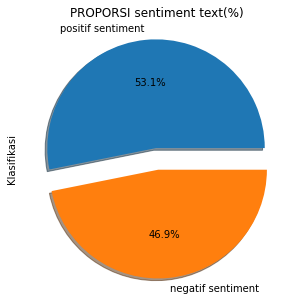

In [ ]:
#proporsi jumlah label kelas pada ulasan
import matplotlib.pyplot as plt
import seaborn as sns
labels = 'positif sentiment','negatif sentiment'
data['Klasifikasi'].value_counts().plot.pie(explode=[0.1,0.1],labels=labels, autopct='%1.1f%%',shadow=True,figsize=(5,5));
plt.title("PROPORSI sentiment text(%)") #data imbalance perlu tindakan
#plt.show()

apabila berdasarkan visualisasi tersebut menunjukkan bahwa proporsi antara kelas positif dan negatif tidak memiliki perbandingan yang seimbang, maka diperlukan suatu metode untuk mengatasi hal tersebut.

In [ ]:
print(data.duplicated().sum())#cek duplicated data terupdate
data.drop_duplicates(inplace=True)
print(data.duplicated().sum())

42
0


In [ ]:
from itertools import chain
from collections import Counter

In [ ]:
# 10 kata yang paling sering muncul 
top = Counter([item for sublist in review1['content'] for item in sublist])
temp = pd.DataFrame(top.most_common(11))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
1,belanja,3528
2,ongkos kirim,3031
3,barang,3017
4,bagus,2253
5,gratis,1928
6,kirim,1910
7,beli,1732
8,bayar,1653
9,gak,1560
10,voucher,1479


In [ ]:
#visualisai 10 kata yang paling sering muncul menggunakan treemap
import plotly.express as px
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

In [ ]:
# visualisasi 10 kata yang paling sering muncul menggunakan bar-chart
fig = px.bar(temp, x="count", y="Common_words", title='Kata-kata Paling Sering Muncul', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

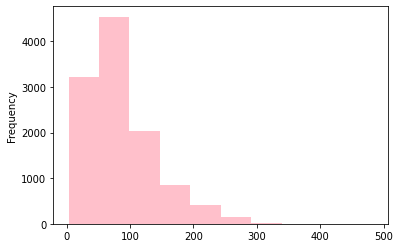

In [ ]:
# checking the distribution of tweets in the data

length_train = data['content'].str.len().plot.hist(color = 'pink', figsize = (6, 4))

In [ ]:
# menghitung panjang karakter pada setiap ulasan
data['len'] = data['content'].str.len()
data.head(10)

,content,Klasifikasi,len
0,bantu olshop percaya kadang store bagus,positif,39.0
1,ngirim buku jogja solo butuh pake buku kuliah ...,negatif,56.0
2,gratis ongkos kirim shopeefood potong ribu,negatif,42.0
3,jelek guna voucher,negatif,18.0
4,belanja online nyaman diskon banyak kirim lalu,positif,46.0
5,tahun percaya ongkos kirim mikir belanja cek m...,negatif,105.0
6,kembali akun saldo shopeepay,positif,28.0
7,aplikasi bagus belanja jual banyak mudah fitur...,positif,63.0
8,bagus aplikasi harga jangkau bagus makasih,positif,42.0
9,mudah ajar beli barang,positif,22.0


In [ ]:
# mendefinisikan kelas positif dan negatif kedalam sebuah variabel
Positive_sent = review1[review1['Klasifikasi']==1]
Negative_sent = review1[review1['Klasifikasi']==0]

In [ ]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['content'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,belanja,2577
1,bagus,1867
2,aplikasi,1751
3,barang,1719
4,ongkos kirim,1288
5,gratis,899
6,kirim,869
7,beli,826
8,mudah,825
9,bantu,785


In [ ]:
fig = px.bar(temp_positive, x="count", y="Common_words", title='Kata-kata Paling Umum PadaKategori Ulasan Sentimen Positif', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['content'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(10))
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Greens')

,Common_words,count
0,aplikasi,1865
1,ongkos kirim,1743
2,barang,1298
3,bayar,1121
4,voucher,1076
5,gak,1046
6,kirim,1041
7,gratis,1029
8,shopeepay,1008
9,belanja,951


In [ ]:
fig = px.bar(temp_negative, x="count", y="Common_words", title='Kata-kata Paling Umum PadaKategori Ulasan Sentimen Negatif', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

**Wordcloud**

berikut merupakan visualisasi wordcloud dari ulasan.

In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [ ]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), color = 'white',
                   title = None, title_size=40, image_color=False):
    
    wordcloud = WordCloud(background_color=color,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
d = 'data[content]'

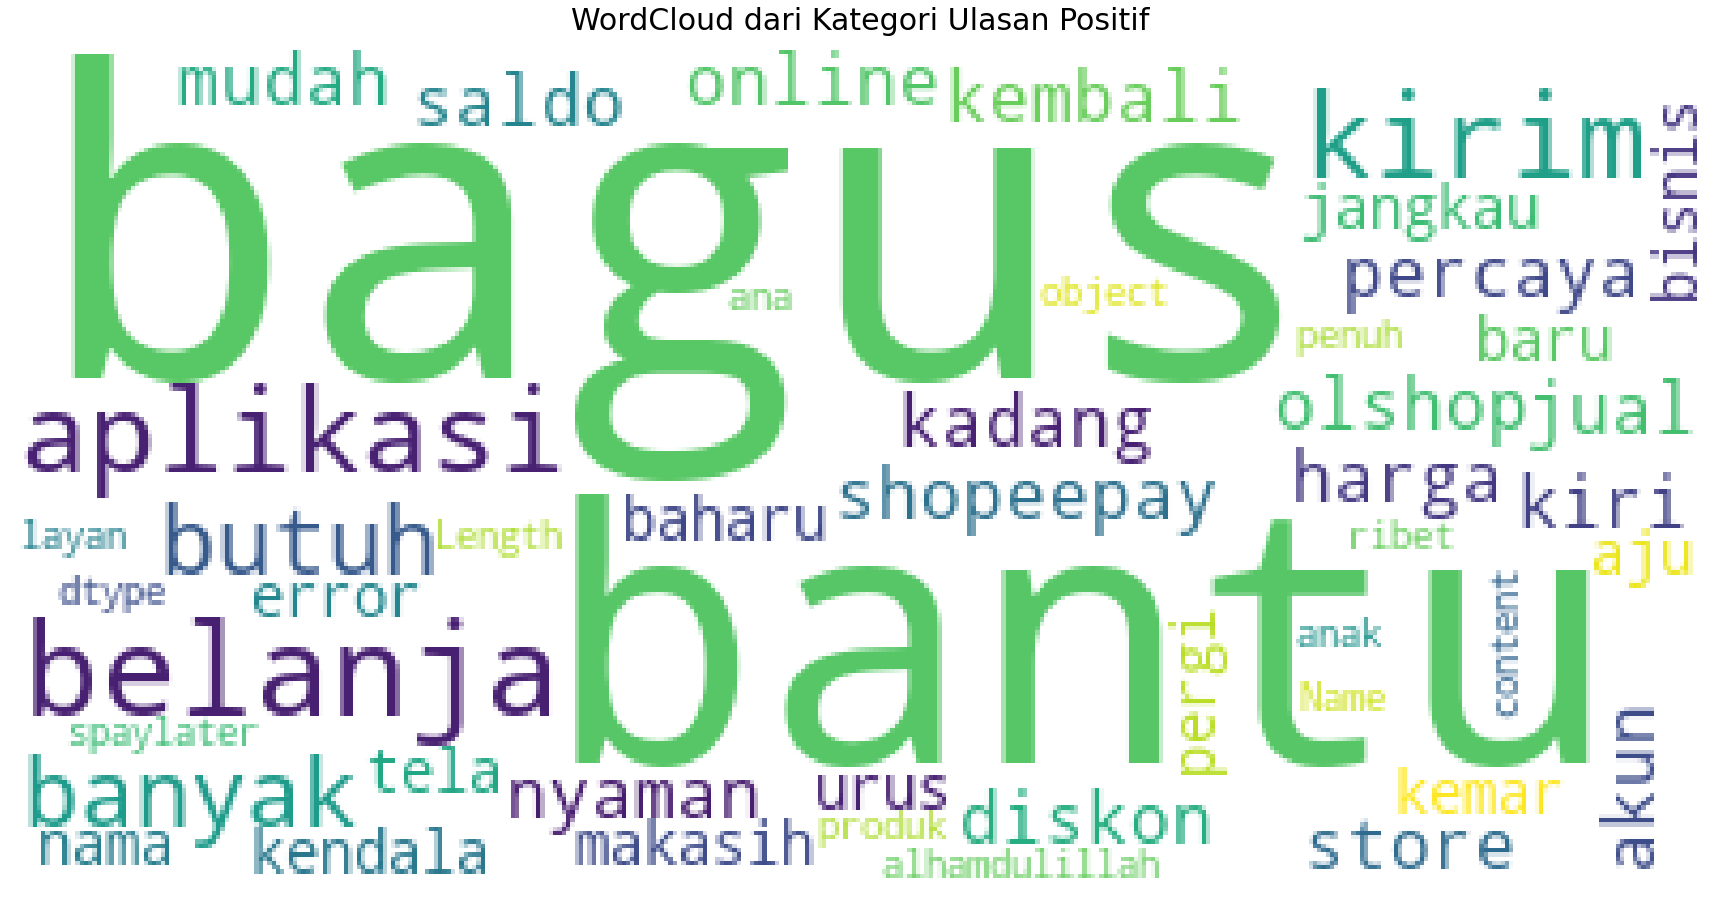

In [ ]:
plot_wordcloud(Positive_sent.content,color='white',max_font_size=100,title_size=30,title="WordCloud dari Kategori Ulasan Positif")

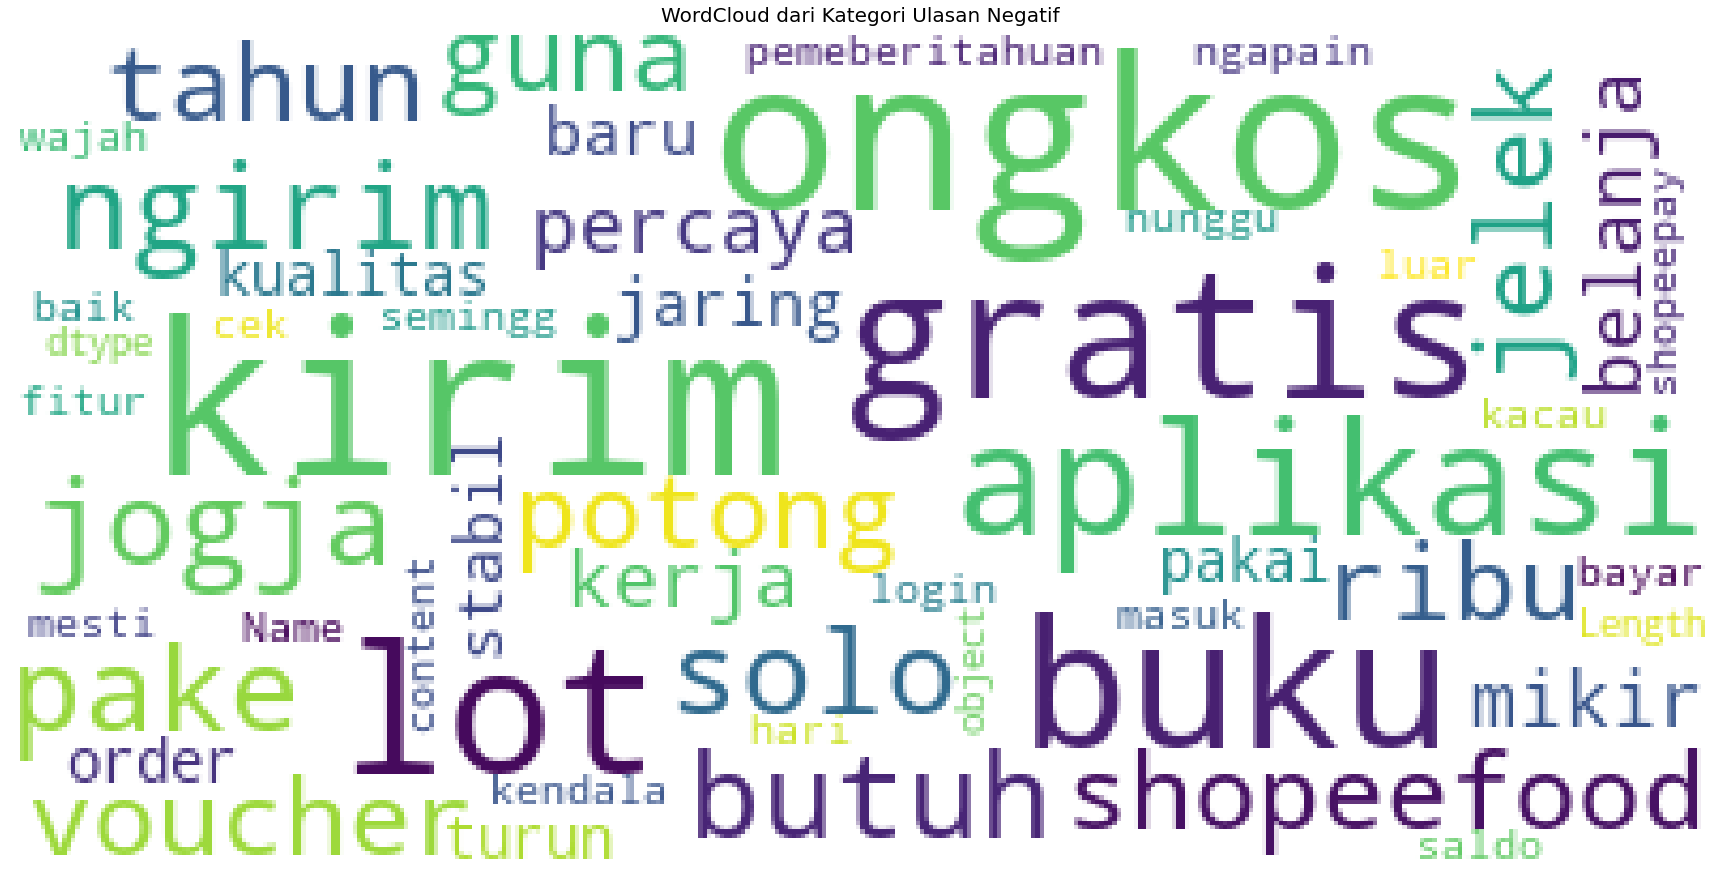

In [ ]:
plot_wordcloud(Negative_sent.content,color='white',max_font_size=50,title_size=20,title="WordCloud dari Kategori Ulasan Negatif")